# Nama : Muhammad Rifan Fathoni
# NIM : 2209106003
# POSTTEST 6

In [1]:
import pandas as pd
import numpy as np

Keterangan : 
-melakukan import library pandas sebagai pd
-melakukan import library numpy sebagai np

In [2]:
df = pd.read_csv("clean_Dataset.csv")

Keterangan : melakukan import dataset menggunakan fungsi pd.read_csv() bawaan pandas

In [3]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df = df.drop(columns=['flight'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


Keterangan : mengahpaus kolom unnmaed:0 dan flight yang tidak berguna

In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

Keterangan : Melakukan import MixMaxScaler,LabelEncoder dari library sklearn.preprocessing

In [6]:
min_max_scaler = MinMaxScaler()
df[['duration', 'price', 'days_left']] = min_max_scaler.fit_transform(df[['duration', 'price', 'days_left']])

col=['airline','source_city','departure_time','stops', 'arrival_time', 'destination_city', 'class']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

In [ ]:
Keterangan : melakukan Standarisasi dan Normalisasi

In [7]:
from sklearn.model_selection import train_test_split

Keterangan : melakukan import library sklearn.model_selection(train_test_split)

In [8]:
x = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3)

Keterangan : melakukan train data dengan test data 30%

In [9]:
import tensorflow as tf

Keterangan : melakukan import library tensorflow sebagai tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

Keterangan : mebuat regresi menggunakan tensorflow

In [11]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

Keterangan : melalukan compile model (mengatur optimizer,loss,metrics)

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=10)

history = model.fit(
    X_train, 
    Y_train, 
    epochs=20,
    verbose=1, 
    validation_data=(X_test, Y_test),
    callbacks=[callback]
)

Epoch 1/20
6566/6566 [==============================] - 28s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0359 - val_loss: 0.0021 - val_mean_absolute_error: 0.0312
Epoch 2/20
6566/6566 [==============================] - 26s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0281 - val_loss: 0.0020 - val_mean_absolute_error: 0.0280
Epoch 3/20
6566/6566 [==============================] - 27s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0261 - val_loss: 0.0017 - val_mean_absolute_error: 0.0254
Epoch 4/20
6566/6566 [==============================] - 26s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0249 - val_loss: 0.0016 - val_mean_absolute_error: 0.0238
Epoch 5/20
6566/6566 [==============================] - 26s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0242 - val_loss: 0.0017 - val_mean_absolute_error: 0.0252
Epoch 6/20
6566/6566 [==============================] - 26s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0237 - val_loss: 0.0015 - val_mean_absolute_error: 0.023

Keterangan : Melakukan training model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Keterangan : melakukan import sklearn.metrics (mean_absolute_error,mean_squared_error,r2_score)

In [14]:
if isinstance(Y_test.iloc[0], (int, float)):  
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    print("R-squared Score:", r2)
else:  
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) 
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy:", accuracy)

2814/2814 [==============================] - 7s 2ms/step
R-squared Score: 0.9637657643362849


Keterangan : menampilkan prediksi menggunakan model yang telah dilatih

In [15]:
print("MAE :", mean_absolute_error(Y_test, y_pred))
print("MSE :", mean_squared_error(Y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R-Squared :", r2_score(Y_test, y_pred))

MAE : 0.021026834214223945
MSE : 0.001264587926640715
RMSE : 0.03556104507239228
R-Squared : 0.9637657643362849


keterangan : menampilkan nilai MAE,MSE,RMSE,R-Squared menggunakan fungsi bawaan skleaarn.metrics dan numpy(evaluasi model yang sudah dilatih)

In [16]:
import matplotlib.pyplot as plt

Keterangan : melakukan import library matplotlib.pyplot sebagai plt

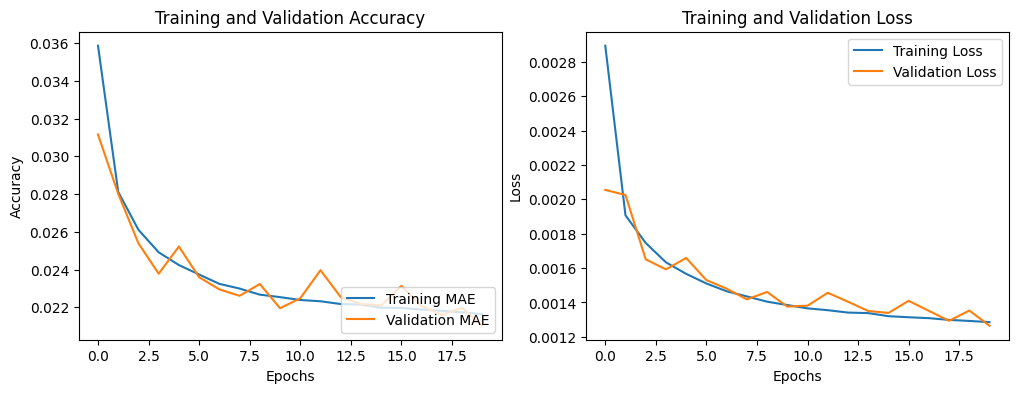

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Keterangan : menampilkan plot hasil prediksi